# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Easy check in a T5. Galleri...
1,"Not Verified | Flight delayed by an hour, it ..."
2,Not Verified | The staff are very rude and not...
3,✅ Trip Verified | Good domestic flight operat...
4,Not Verified | Failed at all basic travel fund...


In [5]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
import seaborn as sns

In [2]:
df = pd.read_csv("BA_reviews.csv")

In [3]:
df.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | Easy check in a T5. Galleri...
1,1,"Not Verified | Flight delayed by an hour, it ..."
2,2,Not Verified | The staff are very rude and not...
3,3,✅ Trip Verified | Good domestic flight operat...
4,4,Not Verified | Failed at all basic travel fund...


In [4]:
df = df.drop('Unnamed: 0',axis=1)

In [6]:
df.head()

,reviews
0,✅ Trip Verified | Easy check in a T5. Galleri...
1,"Not Verified | Flight delayed by an hour, it ..."
2,Not Verified | The staff are very rude and not...
3,✅ Trip Verified | Good domestic flight operat...
4,Not Verified | Failed at all basic travel fund...


In [7]:
df['reviews'][4]

'Not Verified | Failed at all basic travel fundamentals: 1) Our flight was delayed. 2) Staff demanded that we check in our carry on luggage even though we met our carry on allowance. The fact that we have a tight bus connection was totally ignored. 3) Staff were quite unpleasant.'

In [8]:
df['reviews'][0].split("|")

['✅ Trip Verified ',
 '  Easy check in a T5. Galleries south and North lounges packed, only just able to get a seat. Didn’t stay long as B gates lounge much quieter. Flight boarded smoothly and on time. A380 upper deck. Old club world seating which is beginning to age a little. However, like the large toilets on this aircraft type. Cabin crew were all fantastic. One family had tech issues with their seats and entertainment systems which crew worked hard on though sadly without success. Food and drink options were all very good. Entertainment was good. Overall an enjoyable flight.']

In [9]:
df['reviews'][0].split("|")[0],df['reviews'][0].split("|")[1]

('✅ Trip Verified ',
 '  Easy check in a T5. Galleries south and North lounges packed, only just able to get a seat. Didn’t stay long as B gates lounge much quieter. Flight boarded smoothly and on time. A380 upper deck. Old club world seating which is beginning to age a little. However, like the large toilets on this aircraft type. Cabin crew were all fantastic. One family had tech issues with their seats and entertainment systems which crew worked hard on though sadly without success. Food and drink options were all very good. Entertainment was good. Overall an enjoyable flight.')

In [10]:
new =[i.split("|") for i in df['reviews']]

In [11]:
new

[['✅ Trip Verified ',
  '  Easy check in a T5. Galleries south and North lounges packed, only just able to get a seat. Didn’t stay long as B gates lounge much quieter. Flight boarded smoothly and on time. A380 upper deck. Old club world seating which is beginning to age a little. However, like the large toilets on this aircraft type. Cabin crew were all fantastic. One family had tech issues with their seats and entertainment systems which crew worked hard on though sadly without success. Food and drink options were all very good. Entertainment was good. Overall an enjoyable flight.'],
 ['Not Verified ',
  '  Flight delayed by an hour, it happens, no biggie. Had us change our gate at the airport, never happened before but I guess it\'s ok. Gate agent asked us to check our bags and after telling him we would prefer not to do that, he did it anyway. Second gate agent reassigned our seats from exit row to regular which is a huge squeeze my for 6\'3" travel bud. '],
 ['Not Verified ',
  ' T

In [12]:
new_df = pd.DataFrame(new,columns=['verified','comments'])

In [13]:
new_df

,verified,comments
0,✅ Trip Verified,Easy check in a T5. Galleries south and Nort...
1,Not Verified,"Flight delayed by an hour, it happens, no bi..."
2,Not Verified,The staff are very rude and not trained prope...
3,✅ Trip Verified,Good domestic flight operated by BA Cityflye...
4,Not Verified,Failed at all basic travel fundamentals: 1) O...
...,...,...
995,✅ Trip Verified,Johannesburg to London. I tend to stay with ...
996,✅ Trip Verified,Singapore to London Heathrow. It's my first ...
997,✅ Trip Verified,London to Los Angeles. Booked this trip eigh...
998,✅ Trip Verified,Miami to London Heathrow. As with many other...


In [14]:
new_df['verified'].unique()

array(['✅ Trip Verified ', 'Not Verified ', '❎ Not Verified '],
      dtype=object)

In [15]:
new_df['verified'].value_counts()

✅ Trip Verified     797
Not Verified        201
❎ Not Verified        2
Name: verified, dtype: int64

In [17]:
new_df.dtypes

verified    object
comments    object
dtype: object

### The below code is used to remove the icon from the verified column 

In [18]:
new_df['verified'] = new_df['verified'].apply(lambda x: x.replace('✅ ', ''))
new_df['verified'] = new_df['verified'].apply(lambda x: x.replace('❎ ', ''))

In [19]:
new_df['verified'].value_counts()

Trip Verified     797
Not Verified      203
Name: verified, dtype: int64

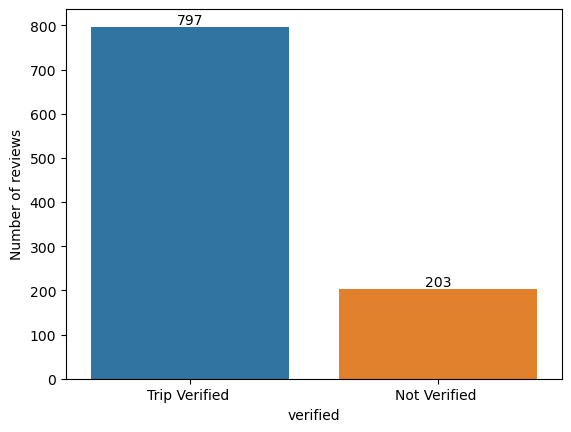

In [20]:
datu = sns.countplot(x=new_df['verified'],data=new_df)
for label in datu.containers:
    datu.bar_label(label)
plt.xlabel("verified")
plt.ylabel("Number of reviews")
plt.show()

### From the above graph what i'm trying to say is, the Trip verified customer review is more than the Not verified customer. i.e 80% customers are registered customer on the particular website.

# Data Cleaning:

Step 1: Remove Punctuation and special character.

Step 2: convert it to lower case letter because python is a case sensitive it will treat "The" and "the" as different words.

Step 3: Remove Stop words

Step 4:Root word Extraction using - Lemmatization


# Step1: Remove Punctuation and Special Character

In [21]:
new_df['processed_comments'] = new_df['comments'].str.replace('[^a-zA-Z0-9]',' ') 
# using Regex Expression we are are removing special character and punctuation

In [22]:
new_df

,verified,comments,processed_comments
0,Trip Verified,Easy check in a T5. Galleries south and Nort...,Easy check in a T5 Galleries south and Nort...
1,Not Verified,"Flight delayed by an hour, it happens, no bi...",Flight delayed by an hour it happens no bi...
2,Not Verified,The staff are very rude and not trained prope...,The staff are very rude and not trained prope...
3,Trip Verified,Good domestic flight operated by BA Cityflye...,Good domestic flight operated by BA Cityflye...
4,Not Verified,Failed at all basic travel fundamentals: 1) O...,Failed at all basic travel fundamentals 1 O...
...,...,...,...
995,Trip Verified,Johannesburg to London. I tend to stay with ...,Johannesburg to London I tend to stay with ...
996,Trip Verified,Singapore to London Heathrow. It's my first ...,Singapore to London Heathrow It s my first ...
997,Trip Verified,London to Los Angeles. Booked this trip eigh...,London to Los Angeles Booked this trip eigh...
998,Trip Verified,Miami to London Heathrow. As with many other...,Miami to London Heathrow As with many other...


In [23]:
new_df['processed_comments'][6]

'  Late boarding led to a one hour flight leaving two hours late  A single BA staff member turned up to board a full flight shortly before the flight was due to depart  There had been no previous announcement of the delay  Once on board the captain blamed Frankfurt ground staff for delaying takeoff when clearly late boarding had resulted in a missed departure slot '

# Step 2: Convert the character to lower case

In [24]:
new_df['processed_comments'] = [i.lower() for i in new_df['processed_comments']]

In [25]:
new_df

,verified,comments,processed_comments
0,Trip Verified,Easy check in a T5. Galleries south and Nort...,easy check in a t5 galleries south and nort...
1,Not Verified,"Flight delayed by an hour, it happens, no bi...",flight delayed by an hour it happens no bi...
2,Not Verified,The staff are very rude and not trained prope...,the staff are very rude and not trained prope...
3,Trip Verified,Good domestic flight operated by BA Cityflye...,good domestic flight operated by ba cityflye...
4,Not Verified,Failed at all basic travel fundamentals: 1) O...,failed at all basic travel fundamentals 1 o...
...,...,...,...
995,Trip Verified,Johannesburg to London. I tend to stay with ...,johannesburg to london i tend to stay with ...
996,Trip Verified,Singapore to London Heathrow. It's my first ...,singapore to london heathrow it s my first ...
997,Trip Verified,London to Los Angeles. Booked this trip eigh...,london to los angeles booked this trip eigh...
998,Trip Verified,Miami to London Heathrow. As with many other...,miami to london heathrow as with many other...


## Step 3: Stop word Removal 

In [26]:
import nltk
# nltk.download('punkt') The package already installed
from nltk.tokenize import word_tokenize
# nltk.download('stopwords') The package already installed
from nltk.corpus import stopwords
# nltk.download('wordnet') The package already installed
from nltk.corpus import wordnet

In [27]:
stop_words = stopwords.words("english") # extracting all the stop words from english language

### Step 3: Function to remove stopwords

In [28]:
def stop_words_removal(remov):
    review_token = word_tokenize(remov)
    token_classified = " ".join([i for i in review_token if i not in stop_words])
    return token_classified


In [29]:
new_df['stop_words_removed'] = [ stop_words_removal(r) for r in new_df['processed_comments']]

In [30]:
new_df

,verified,comments,processed_comments,stop_words_removed
0,Trip Verified,Easy check in a T5. Galleries south and Nort...,easy check in a t5 galleries south and nort...,easy check t5 galleries south north lounges pa...
1,Not Verified,"Flight delayed by an hour, it happens, no bi...",flight delayed by an hour it happens no bi...,flight delayed hour happens biggie us change g...
2,Not Verified,The staff are very rude and not trained prope...,the staff are very rude and not trained prope...,staff rude trained properly exceptions made ch...
3,Trip Verified,Good domestic flight operated by BA Cityflye...,good domestic flight operated by ba cityflye...,good domestic flight operated ba cityflyer gro...
4,Not Verified,Failed at all basic travel fundamentals: 1) O...,failed at all basic travel fundamentals 1 o...,failed basic travel fundamentals 1 flight dela...
...,...,...,...,...
995,Trip Verified,Johannesburg to London. I tend to stay with ...,johannesburg to london i tend to stay with ...,johannesburg london tend stay airline frequent...
996,Trip Verified,Singapore to London Heathrow. It's my first ...,singapore to london heathrow it s my first ...,singapore london heathrow first time traveling...
997,Trip Verified,London to Los Angeles. Booked this trip eigh...,london to los angeles booked this trip eigh...,london los angeles booked trip eight months pr...
998,Trip Verified,Miami to London Heathrow. As with many other...,miami to london heathrow as with many other...,miami london heathrow many others posted revie...


In [31]:
new_df['stop_words_removed'][999]

'london heathrow milan malpensa worst airline ever dealt fly 100 times year british airways lost wife luggage vacation unbelievably rude unhelpful resolving issue ruined vacation refuse help us please never book airline'

## Step 4: Lemmatization

Lemmatization is rule driven approach, where the inputs are Parts of speech and and the root words.

In [32]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
# nltk.download('omw-1.4')
# nltk.download('averaged_perceptron_tagger')

In [35]:
lemma = WordNetLemmatizer()

In [36]:
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    if nltk_tag.startswith('N'):
        return wordnet.NOUN
    if nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

## Lemmatization process involes
1.The sentence can be taken as input and do word_tokenize
2.Add parts of speech tag to each and every word
3.It will covert the parts of speech into shallow parts of speech
4.Do Lemmatization and extract root word from each and every reviews

In [37]:
def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    wordnet_tagged = map(lambda x:(x[0],nltk_tag_to_wordnet_tag(x[1])),nltk_tagged)
    lemmatized_sentence=[]
    for word,tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:
            lemmatized_sentence.append(lemma.lemmatize(word,tag))
    return " ".join(lemmatized_sentence)

In [38]:
new_df['stopword_lemma_postag'] = new_df['stop_words_removed'].apply(lambda x: lemmatize_sentence(x))

In [39]:
new_df

,verified,comments,processed_comments,stop_words_removed,stopword_lemma_postag
0,Trip Verified,Easy check in a T5. Galleries south and Nort...,easy check in a t5 galleries south and nort...,easy check t5 galleries south north lounges pa...,easy check t5 gallery south north lounge pack ...
1,Not Verified,"Flight delayed by an hour, it happens, no bi...",flight delayed by an hour it happens no bi...,flight delayed hour happens biggie us change g...,flight delay hour happens biggie us change gat...
2,Not Verified,The staff are very rude and not trained prope...,the staff are very rude and not trained prope...,staff rude trained properly exceptions made ch...,staff rude train properly exception make child...
3,Trip Verified,Good domestic flight operated by BA Cityflye...,good domestic flight operated by ba cityflye...,good domestic flight operated ba cityflyer gro...,good domestic flight operate ba cityflyer grou...
4,Not Verified,Failed at all basic travel fundamentals: 1) O...,failed at all basic travel fundamentals 1 o...,failed basic travel fundamentals 1 flight dela...,fail basic travel fundamental 1 flight delay 2...
...,...,...,...,...,...
995,Trip Verified,Johannesburg to London. I tend to stay with ...,johannesburg to london i tend to stay with ...,johannesburg london tend stay airline frequent...,johannesburg london tend stay airline frequent...
996,Trip Verified,Singapore to London Heathrow. It's my first ...,singapore to london heathrow it s my first ...,singapore london heathrow first time traveling...,singapore london heathrow first time travel br...
997,Trip Verified,London to Los Angeles. Booked this trip eigh...,london to los angeles booked this trip eigh...,london los angeles booked trip eight months pr...,london los angeles book trip eight month previ...
998,Trip Verified,Miami to London Heathrow. As with many other...,miami to london heathrow as with many other...,miami london heathrow many others posted revie...,miami london heathrow many others post review ...


In [40]:
new_df['stop_words_removed'][5]

'lost baggage simple situation three weeks care communication whatsoever connection checkpoint heathrow 3hrs connecting flight last leg trip agent insists checking hand luggage since plane full lose claim arrival airport immediately three weeks communication whatsoever online status still searching bag updates conclusion ba males effort find missing bag care'

In [41]:
new_df['stopword_lemma_postag'][5]

'lose baggage simple situation three week care communication whatsoever connection checkpoint heathrow 3hrs connect flight last leg trip agent insist check hand luggage since plane full lose claim arrival airport immediately three week communication whatsoever online status still search bag update conclusion ba male effort find miss bag care'

## Sentiment Analysis using Vader 

VADER (Valence Aware Dictionary and Sentiment Reasoner) is a lexicon and rule-based sentiment analysis tool

In [42]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [43]:
def vader_analysis(sentence):
    groups = analyzer.polarity_scores(sentence)
    return groups['compound']

In [44]:
new_df['vader_score'] = new_df['stopword_lemma_postag'].apply(vader_analysis)


In [45]:
new_df

,verified,comments,processed_comments,stop_words_removed,stopword_lemma_postag,vader_score
0,Trip Verified,Easy check in a T5. Galleries south and Nort...,easy check in a t5 galleries south and nort...,easy check t5 galleries south north lounges pa...,easy check t5 gallery south north lounge pack ...,0.9415
1,Not Verified,"Flight delayed by an hour, it happens, no bi...",flight delayed by an hour it happens no bi...,flight delayed hour happens biggie us change g...,flight delay hour happens biggie us change gat...,-0.2235
2,Not Verified,The staff are very rude and not trained prope...,the staff are very rude and not trained prope...,staff rude trained properly exceptions made ch...,staff rude train properly exception make child...,-0.7698
3,Trip Verified,Good domestic flight operated by BA Cityflye...,good domestic flight operated by ba cityflye...,good domestic flight operated ba cityflyer gro...,good domestic flight operate ba cityflyer grou...,0.9420
4,Not Verified,Failed at all basic travel fundamentals: 1) O...,failed at all basic travel fundamentals 1 o...,failed basic travel fundamentals 1 flight dela...,fail basic travel fundamental 1 flight delay 2...,-0.9097
...,...,...,...,...,...,...
995,Trip Verified,Johannesburg to London. I tend to stay with ...,johannesburg to london i tend to stay with ...,johannesburg london tend stay airline frequent...,johannesburg london tend stay airline frequent...,0.9578
996,Trip Verified,Singapore to London Heathrow. It's my first ...,singapore to london heathrow it s my first ...,singapore london heathrow first time traveling...,singapore london heathrow first time travel br...,0.5994
997,Trip Verified,London to Los Angeles. Booked this trip eigh...,london to los angeles booked this trip eigh...,london los angeles booked trip eight months pr...,london los angeles book trip eight month previ...,-0.9041
998,Trip Verified,Miami to London Heathrow. As with many other...,miami to london heathrow as with many other...,miami london heathrow many others posted revie...,miami london heathrow many others post review ...,0.8873


In [46]:
def vader_score_analysis(score):
    if score >= 0.5:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"

In [47]:
new_df['sentiment'] = new_df['vader_score'].apply(vader_score_analysis)

In [48]:
new_df

,verified,comments,processed_comments,stop_words_removed,stopword_lemma_postag,vader_score,sentiment
0,Trip Verified,Easy check in a T5. Galleries south and Nort...,easy check in a t5 galleries south and nort...,easy check t5 galleries south north lounges pa...,easy check t5 gallery south north lounge pack ...,0.9415,positive
1,Not Verified,"Flight delayed by an hour, it happens, no bi...",flight delayed by an hour it happens no bi...,flight delayed hour happens biggie us change g...,flight delay hour happens biggie us change gat...,-0.2235,negative
2,Not Verified,The staff are very rude and not trained prope...,the staff are very rude and not trained prope...,staff rude trained properly exceptions made ch...,staff rude train properly exception make child...,-0.7698,negative
3,Trip Verified,Good domestic flight operated by BA Cityflye...,good domestic flight operated by ba cityflye...,good domestic flight operated ba cityflyer gro...,good domestic flight operate ba cityflyer grou...,0.9420,positive
4,Not Verified,Failed at all basic travel fundamentals: 1) O...,failed at all basic travel fundamentals 1 o...,failed basic travel fundamentals 1 flight dela...,fail basic travel fundamental 1 flight delay 2...,-0.9097,negative
...,...,...,...,...,...,...,...
995,Trip Verified,Johannesburg to London. I tend to stay with ...,johannesburg to london i tend to stay with ...,johannesburg london tend stay airline frequent...,johannesburg london tend stay airline frequent...,0.9578,positive
996,Trip Verified,Singapore to London Heathrow. It's my first ...,singapore to london heathrow it s my first ...,singapore london heathrow first time traveling...,singapore london heathrow first time travel br...,0.5994,positive
997,Trip Verified,London to Los Angeles. Booked this trip eigh...,london to los angeles booked this trip eigh...,london los angeles booked trip eight months pr...,london los angeles book trip eight month previ...,-0.9041,negative
998,Trip Verified,Miami to London Heathrow. As with many other...,miami to london heathrow as with many other...,miami london heathrow many others posted revie...,miami london heathrow many others post review ...,0.8873,positive


In [49]:
new_df['sentiment'].value_counts()

positive    493
negative    395
neutral     112
Name: sentiment, dtype: int64

In [50]:
new_df['sentiment'].value_counts(normalize=True)

positive    0.493
negative    0.395
neutral     0.112
Name: sentiment, dtype: float64

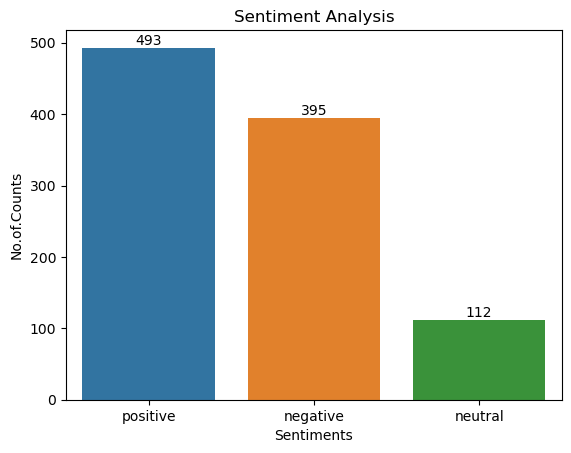

In [59]:
data = sns.countplot(x = new_df['sentiment'],data=new_df)
for label in data.containers:
    data.bar_label(label)
plt.title("Sentiment Analysis")
plt.xlabel("Sentiments")
plt.ylabel("No.of.Counts")
plt.show()

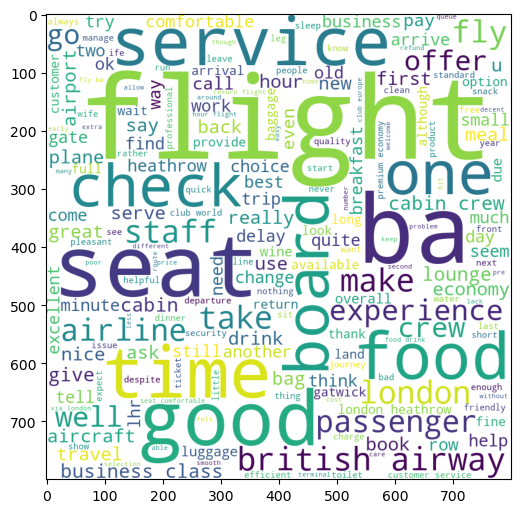

In [58]:
from wordcloud import WordCloud
word_cloud_data = new_df.loc[new_df['sentiment']=='positive',:]
words = " ".join([i for i in word_cloud_data['stopword_lemma_postag']])
words_cloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      min_font_size = 10).generate(words)
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(words_cloud)
plt.tight_layout(pad=0)
plt.show()